**Importing libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import sklearn
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.utils import shuffle
from sklearn import svm
import csv
import os 
import cv2

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import to_categorical

In [2]:
# Dataset name
dataset_name = 'Emotion Original Dataset'

train_data_dir = dataset_name + '/train/'

# Set up sampling rate
sample_rate = 1

**Visualisation for Class Sad**

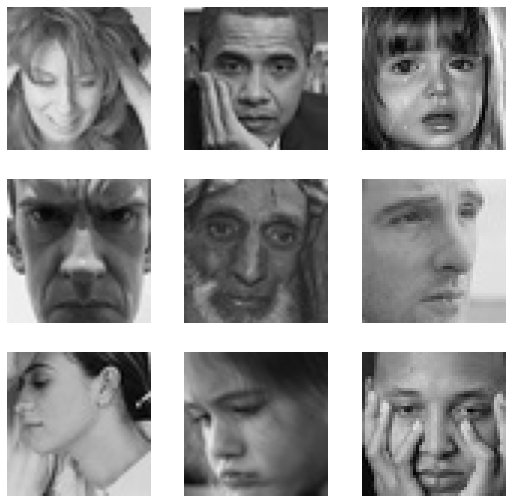

In [3]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"sad/"+os.listdir(train_data_dir + "sad/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "sad/")[i])))

**Visualisation for Class Happy**

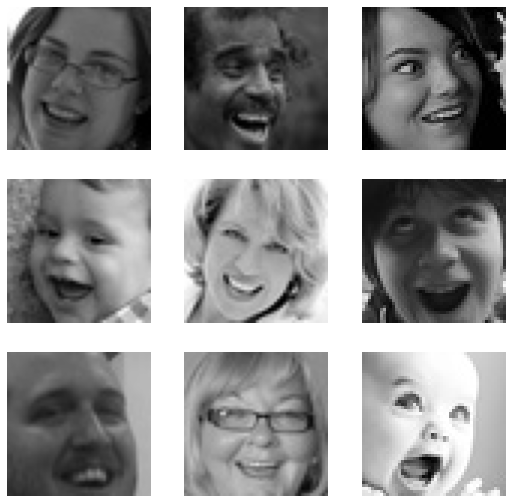

In [4]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"happy/"+os.listdir(train_data_dir + "happy/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "happy/")[i])))

**Visualisation for class Angry**

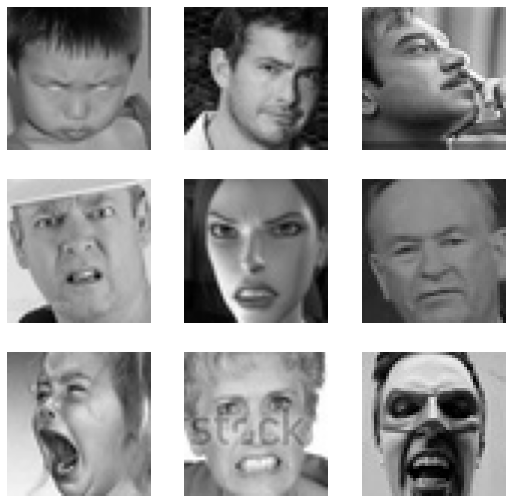

In [5]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"angry/"+os.listdir(train_data_dir + "angry/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "angry/")[i])))

**Visualisation for Class Surprise**

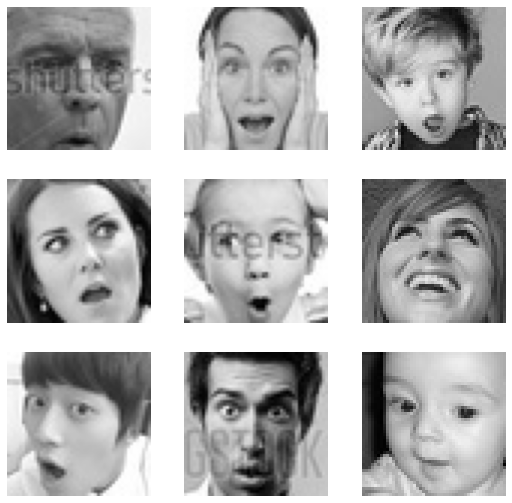

In [6]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"surprise/"+os.listdir(train_data_dir + "surprise/")[i]))

**Visualisation for Class Disgust**

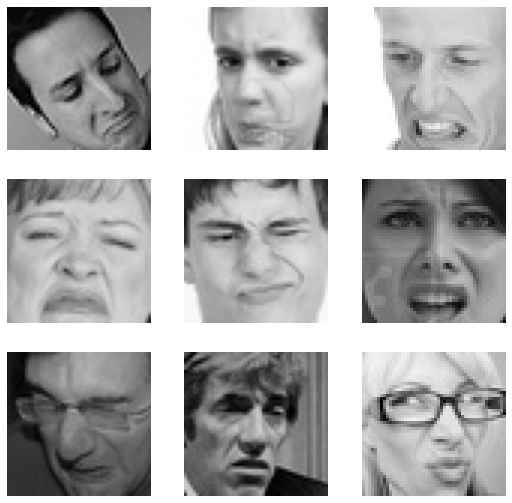

In [7]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"disgust/"+os.listdir(train_data_dir + "disgust/")[i]))
    

**Visualisation for class fear**

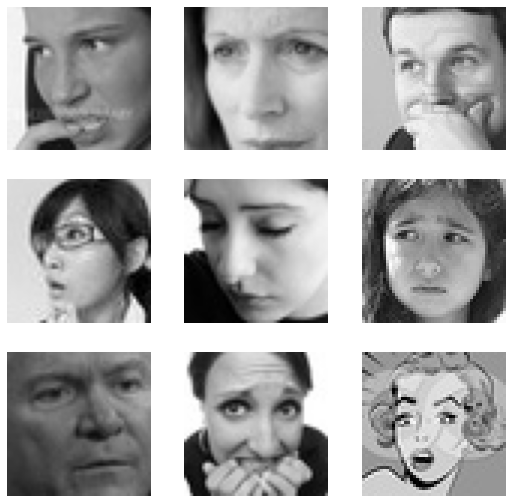

In [8]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"fear/"+os.listdir(train_data_dir + "fear/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "fear/")[i])))

In [9]:
#Traversing through sub folders
training_class_folders = [i for i in os.listdir(train_data_dir)] 
num_classes = len(training_class_folders)

# desired dimensions of our images.
img_width, img_height = 48,48

# Set input shape
input_shape = (img_width, img_height,3)
# Initialise arrays for data storage
X_train = np.ndarray((0, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)
y_train= np.ndarray(0, dtype=np.str)

**Processing the training class folders**

In [10]:
# Iterate through the class folders
for i, image_cls in enumerate(training_class_folders):
    
    print('Class {}'.format(image_cls))
    image_class_folder = train_data_dir + image_cls + "/"
    
    # generate filenames from the data folder and do sampling
    image_filenames = [image_class_folder+i for i in os.listdir(image_class_folder)] 
    image_filenames = random.sample(image_filenames, int(len(image_filenames)*sample_rate))

    # Create a data array for image data
    count = len(image_filenames)
    X_data_part = np.ndarray((count, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)

    # Iterate through the filenames and for each one load the image, resize and normalise
    for i, image_file in enumerate(image_filenames):

        # Resize the image
        image = cv2.imread(image_file, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (img_width, img_height), interpolation=cv2.INTER_CUBIC)        
        image = image[:,:,[2,1,0]]
        
        # Add image data to data array and normalise
        X_data_part[i] = image
        X_data_part[i] = X_data_part[i]/255
        
        # Add label to label array
        y_train = np.append(y_train, image_cls)#class 
        
    print('Processed {} of {} for class {} '.format(i + 1, count, image_cls))
    
    # Append the part to the overall data array
    X_train = np.append(X_train, X_data_part, axis=0)
    
print("Data shape: {}".format(X_train.shape))

Class angry
Processed 3994 of 3994 for class angry 
Class disgust
Processed 436 of 436 for class disgust 
Class fear
Processed 4095 of 4095 for class fear 
Class happy
Processed 7211 of 7211 for class happy 
Class neutral
Processed 4960 of 4960 for class neutral 
Class sad
Processed 4826 of 4826 for class sad 
Class surprise
Processed 3165 of 3165 for class surprise 
Data shape: (28687, 48, 48, 3)


In [11]:
print(X_train.shape,y_train.shape)

(28687, 48, 48, 3) (28687,)


**Processing the test class folders**

In [12]:
X_test = np.ndarray((0, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)
y_test= np.ndarray(0, dtype=np.str)
test_data_dir = dataset_name + '/test/'
test_class_folders = [i for i in os.listdir(test_data_dir)] 
# Iterate through the class folders
for i, image_cls in enumerate(test_class_folders):
    
    print('Class {}'.format(image_cls))
    image_class_folder = test_data_dir + image_cls + "/"
    
    # generate filenames from the data folder and do sampling
    image_filenames = [image_class_folder+i for i in os.listdir(image_class_folder)] 
    image_filenames = random.sample(image_filenames, int(len(image_filenames)*sample_rate))

    # Create a data array for image data
    count = len(image_filenames)
    X_data_part = np.ndarray((count, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)

    # Iterate throuigh the filenames and for each one load the image, resize and normalise
    for i, image_file in enumerate(image_filenames):

        # Resize the image
        image = cv2.imread(image_file, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (img_width, img_height), interpolation=cv2.INTER_CUBIC)        
        image = image[:,:,[2,1,0]]
        
        # Add image data to data array and normalise
        X_data_part[i] = image
        X_data_part[i] = X_data_part[i]/255
        
        
        # Add label to label array
        y_test = np.append(y_test, image_cls)#class 
        
    print('Processed {} of {} for class {} '.format(i + 1, count, image_cls))
    
    # Append the part to the overall data array
    X_test = np.append(X_test, X_data_part, axis=0)
    
print("Data shape: {}".format(X_test.shape))

Class angry
Processed 958 of 958 for class angry 
Class disgust
Processed 111 of 111 for class disgust 
Class fear
Processed 1024 of 1024 for class fear 
Class happy
Processed 1773 of 1773 for class happy 
Class neutral
Processed 1231 of 1231 for class neutral 
Class sad
Processed 1245 of 1245 for class sad 
Class surprise
Processed 830 of 830 for class surprise 
Data shape: (7172, 48, 48, 3)


In [13]:
print(X_test.shape,y_test.shape)

(7172, 48, 48, 3) (7172,)


**Handling Imbalanced Data**

In [14]:
#Reshaping to 2d
newshape=X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_new=X_train.reshape(len(X_train),newshape)

In [15]:
X_new.shape

(28687, 6912)

In [16]:
y_train.shape

(28687,)

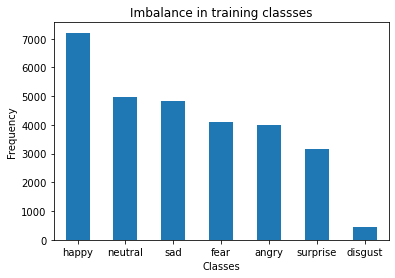

In [17]:
data = pd.DataFrame(data={'Classes':y_train})
data['Classes'].value_counts().plot(kind='bar',rot=0)
plt.title('Imbalance in training classses')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [18]:
from imblearn.over_sampling import RandomOverSampler
r =  RandomOverSampler()
X_train_res,y_train_res=r.fit_resample(X_new, y_train)

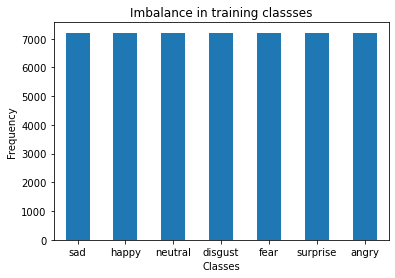

In [19]:
data = pd.DataFrame(data={'Classes':y_train_res})
data['Classes'].value_counts().plot(kind='bar',rot=0)
plt.title('Imbalance in training classses')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [20]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({'happy': 7211, 'neutral': 4960, 'sad': 4826, 'fear': 4095, 'angry': 3994, 'surprise': 3165, 'disgust': 436})
Resampled dataset shape Counter({'angry': 7211, 'disgust': 7211, 'fear': 7211, 'happy': 7211, 'neutral': 7211, 'sad': 7211, 'surprise': 7211})


In [21]:
#Reshaping back to input for neural network
X_train=X_train_res.reshape(len(X_train_res),img_width, img_height,3)

Converting target classes to y representation(binary representation)

In [22]:
y_train_encoder = sklearn.preprocessing.LabelEncoder()
y_train_num = y_train_encoder.fit_transform(y_train_res)
y_train_wide = to_categorical(y_train_num, num_classes)

y_test_num = y_train_encoder.fit_transform(y_test)
y_test_wide = to_categorical(y_test_num, num_classes)

# Model Building and Training

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))#input shape is shape of image
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #we get a fully connected layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes))#Output layer
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          1

In [24]:
batch_size = 128
epochs = 40

best_weights_filepath = './Emotion_model.hdf5'
mcp = ModelCheckpoint(best_weights_filepath, monitor="val_accuracy",
                      save_best_only=True, save_weights_only=False,mode='max')

history = model.fit(X_train, y_train_wide,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2,
          shuffle=True,
          callbacks=[mcp])

#reload best weights
model.load_weights(best_weights_filepath)

Epoch 1/40
316/316 [==============================] - 38s 82ms/step - loss: 1.8694 - accuracy: 0.2270 - val_loss: 1.7005 - val_accuracy: 0.3275
Epoch 2/40
316/316 [==============================] - 26s 82ms/step - loss: 1.5130 - accuracy: 0.4278 - val_loss: 1.5804 - val_accuracy: 0.3997
Epoch 3/40
316/316 [==============================] - 26s 82ms/step - loss: 1.2874 - accuracy: 0.5155 - val_loss: 1.4971 - val_accuracy: 0.4332
Epoch 4/40
316/316 [==============================] - 26s 81ms/step - loss: 1.1582 - accuracy: 0.5629 - val_loss: 1.4925 - val_accuracy: 0.4393
Epoch 5/40
316/316 [==============================] - 26s 82ms/step - loss: 1.0806 - accuracy: 0.5893 - val_loss: 1.2680 - val_accuracy: 0.5109
Epoch 6/40
316/316 [==============================] - 25s 81ms/step - loss: 1.0173 - accuracy: 0.6134 - val_loss: 1.2325 - val_accuracy: 0.5301
Epoch 7/40
316/316 [==============================] - 26s 82ms/step - loss: 0.9730 - accuracy: 0.6324 - val_loss: 1.2189 - val_accuracy:

# Plotting Accuracy And Loss

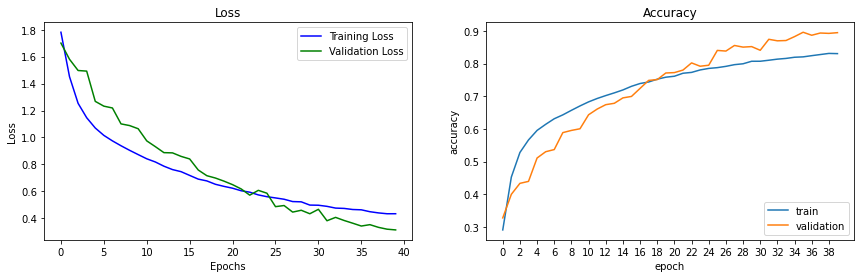

In [25]:
plt.subplots_adjust(left=None, bottom=None, right = 2, top=None, wspace=None, hspace=None)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(0,epochs)[0::2])
plt.legend(['train', 'validation'], loc='lower right')

# Evaluation

In [26]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [120]:
predlabels = model.predict(X_test)
predlabels.argmax(axis=1)

array([5, 0, 0, ..., 6, 4, 6], dtype=int64)

In [36]:
emotions={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

<ipython-input-107-3c0d90263ef5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


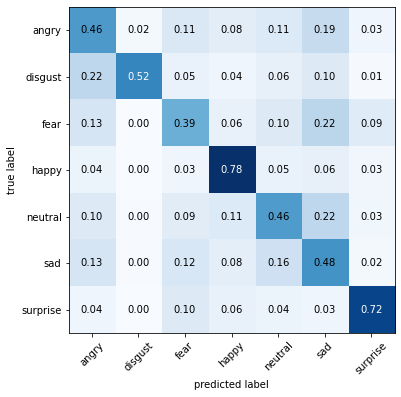

In [107]:
conf_mat = confusion_matrix(y_test_num, predlabels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(7, 6))
fig.show()

**Precision for class Suprise is the number of correctly predicted Surprise out of all predictions for Surprise**

**Recall for class Surprised is the number of correclty predicted Surprise out of all actual Suprise**

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test_num, predlabels.argmax(axis=1), target_names=emotions.values()))

              precision    recall  f1-score   support

       angry       0.45      0.46      0.45       958
     disgust       0.62      0.52      0.57       111
        fear       0.44      0.39      0.41      1024
       happy       0.77      0.78      0.77      1773
     neutral       0.50      0.46      0.48      1231
         sad       0.42      0.48      0.45      1245
    surprise       0.72      0.72      0.72       830

    accuracy                           0.56      7172
   macro avg       0.56      0.54      0.55      7172
weighted avg       0.56      0.56      0.56      7172



In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Weighted Precision: {:.2f}'.format(precision_score(y_test_num, predlabels.argmax(axis=1), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_num, predlabels.argmax(axis=1), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_num, predlabels.argmax(axis=1), average='weighted')))

Weighted Precision: 0.56
Weighted Recall: 0.56
Weighted F1-score: 0.56


In [54]:
predictions=predlabels.argmax(axis=1)
corrects=predictions==y_test_num
corrects

array([False,  True,  True, ...,  True, False,  True])

**Correct Classifications**

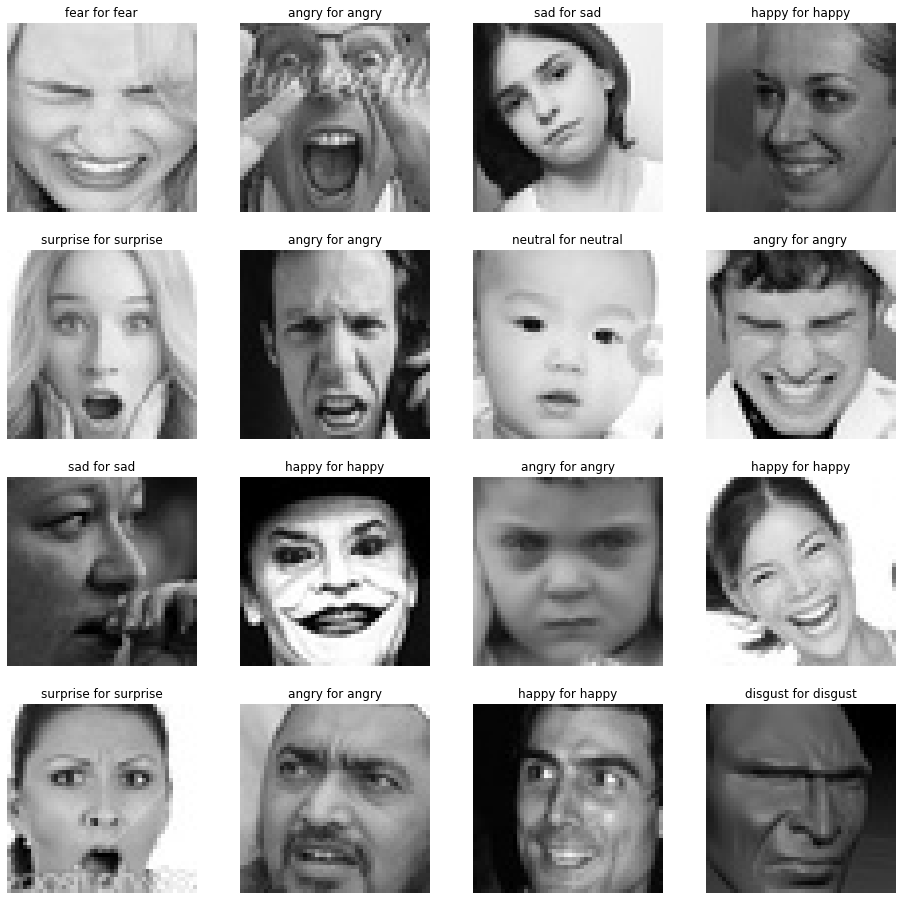

In [93]:
import PIL
pltsize=4
row_images = 4
col_images = 4

maxtoshow = row_images * col_images
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(X_test.shape[0]):
    rand =random.randint(0,X_test.shape[0])
    if ii>=maxtoshow:
        break
    if predictions[rand]==y_test_num[rand] :
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow(PIL.Image.fromarray(((X_test[rand]) * 255).astype(np.uint8)))
        plt.title("{} for {}".format(emotions[predictions[rand]], y_test[rand]))
        ii = ii + 1

**Incorrect Classifications**

In [65]:
errors=predictions!=y_test_num
errors

array([ True, False, False, ..., False,  True, False])

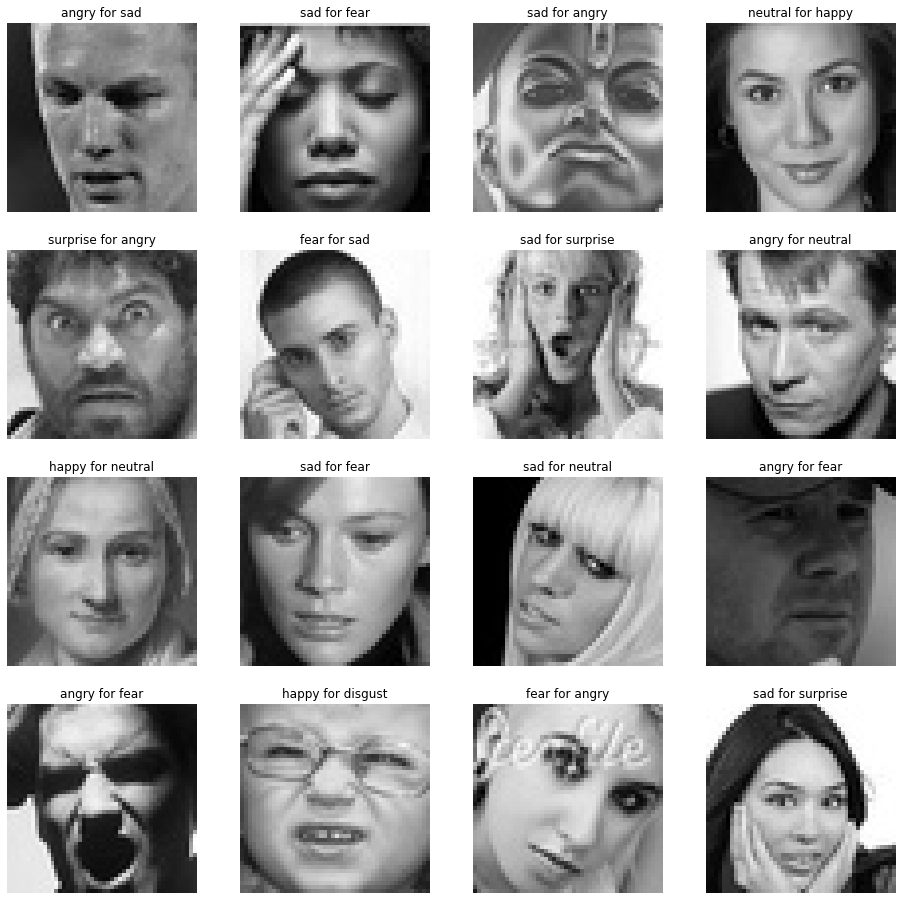

In [94]:
pltsize=4
row_images = 4
col_images = 4

maxtoshow = row_images * col_images
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(X_test.shape[0]):
    rand =random.randint(0,X_test.shape[0])
    if ii>=maxtoshow:
        break
    if predictions[rand]!=y_test_num[rand] :
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow(PIL.Image.fromarray(((X_test[rand]) * 255).astype(np.uint8)))
        plt.title("{} for {}".format(emotions[predictions[rand]], y_test[rand]))
        ii = ii + 1

In [99]:
corrects=predictions==y_test_num
len(corrects)

7172

In [101]:
corr=[]
err=[]
for i in corrects:
    if i==True:
        corr.append(i)
    else:
        err.append(i)

In [103]:
len(err)

3131

In [109]:
mis=len(err)/len(predictions)
mis

0.43655883993307304

In [3]:
print('Misclassification Rate %:',np.round(mis,2)*100)

Misclassification Rate %: 44.0
